In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from scipy import stats

boston = fetch_openml(name="boston", as_frame=True)
df = boston.frame.copy()
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0,35,70,100], labels=['<=35','35-70','>=70'])
df.head()

d:\ManhProject\chatbot-tinz\jupyter\lib\site-packages\sklearn\datasets\_openml.py:328: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_GROUP
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,35-70
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,>=70
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,35-70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,35-70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,35-70


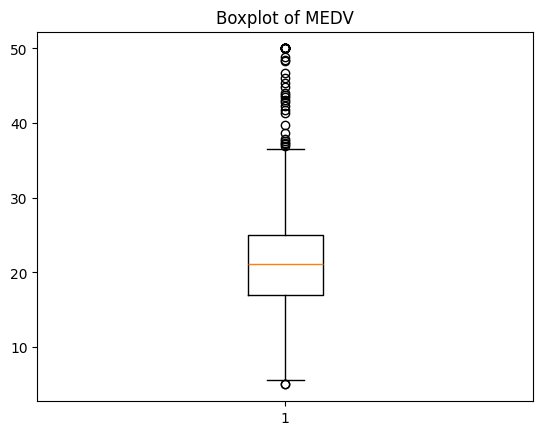

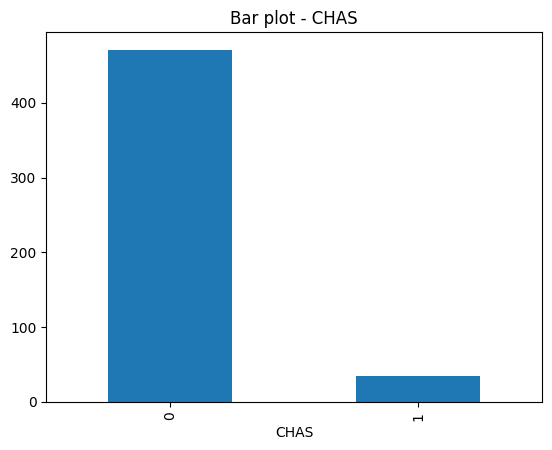

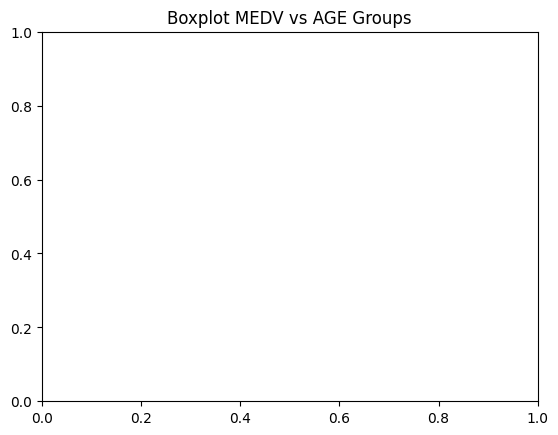

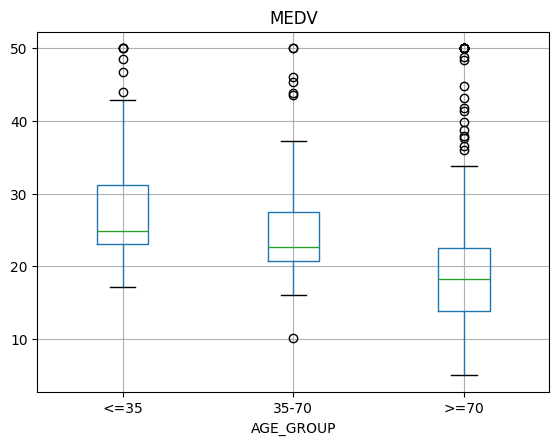

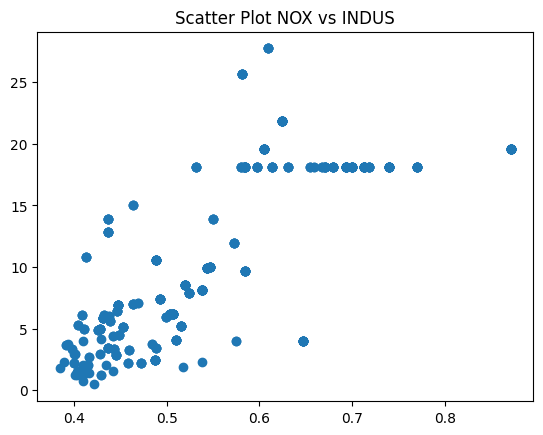

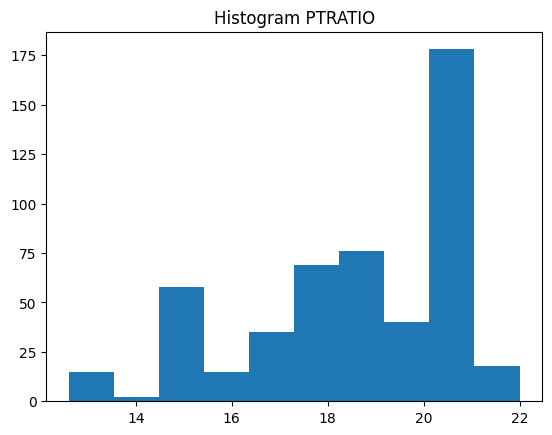

d:\ManhProject\chatbot-tinz\jupyter\lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


(np.float64(nan),
 np.float64(1.7105011022702984e-15),
 (np.float64(0.763651446920915), np.float64(7.913361061241532e-98)),
 (np.float64(1.0916130158411093), np.float64(1.2066117273371223e-08)))

In [4]:
plt.figure(); plt.title("Boxplot of MEDV"); plt.boxplot(df['MEDV']); plt.show()
plt.figure(); plt.title("Bar plot - CHAS"); df['CHAS'].value_counts().plot(kind='bar'); plt.show()
plt.figure(); plt.title("Boxplot MEDV vs AGE Groups"); df.boxplot(column='MEDV', by='AGE_GROUP'); plt.suptitle(""); plt.show()
plt.figure(); plt.title("Scatter Plot NOX vs INDUS"); plt.scatter(df['NOX'], df['INDUS']); plt.show()
plt.figure(); plt.title("Histogram PTRATIO"); plt.hist(df['PTRATIO']); plt.show()

chas1 = df[df['CHAS']==1]['MEDV']
chas0 = df[df['CHAS']==0]['MEDV']
t_stat, p_val_ttest = stats.ttest_ind(chas1, chas0)

anova = stats.f_oneway(df[df['AGE_GROUP']=='<=35']['MEDV'], df[df['AGE_GROUP']=='35-70']['MEDV'], df[df['AGE_GROUP']=='>=70']['MEDV'])
corr, p_corr = stats.pearsonr(df['NOX'], df['INDUS'])
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(df['DIS'], df['MEDV'])

p_val_ttest, anova.pvalue, (corr,p_corr), (slope,p_value_reg)